## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons   #importing the make moons dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [2]:
# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

splitting the data

In [3]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Visualize the data

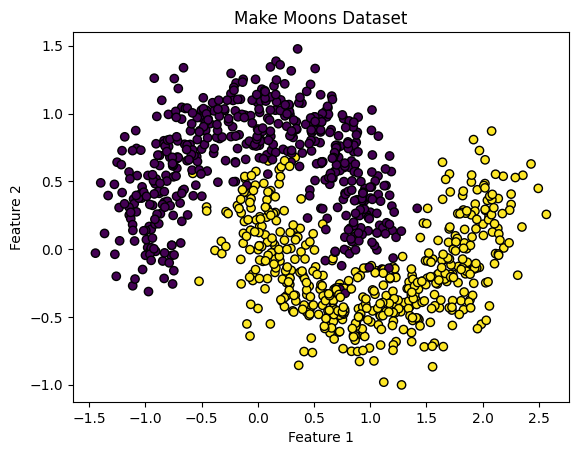

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Make Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Defining the model

In [6]:
# Create the MLP model
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(4, activation='relu'),  # Hidden layer 2
    Dense(1, activation='sigmoid')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Train The Model

In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4712 - loss: 0.8829 - val_accuracy: 0.5312 - val_loss: 0.7394
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5089 - loss: 0.7544 - val_accuracy: 0.5312 - val_loss: 0.6749
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4914 - loss: 0.6995 - val_accuracy: 0.5312 - val_loss: 0.6226
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4983 - loss: 0.6333 - val_accuracy: 0.5750 - val_loss: 0.5779
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5026 - loss: 0.6132 - val_accuracy: 0.6625 - val_loss: 0.5378
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.5691 - val_accuracy: 0.7312 - val_loss: 0.5055
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7284 - loss: 0.5081 - val_accuracy: 0.8062 - val_loss: 0.4809
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7853 - loss: 0.5070 - val_accuracy: 0.8188 - val_los

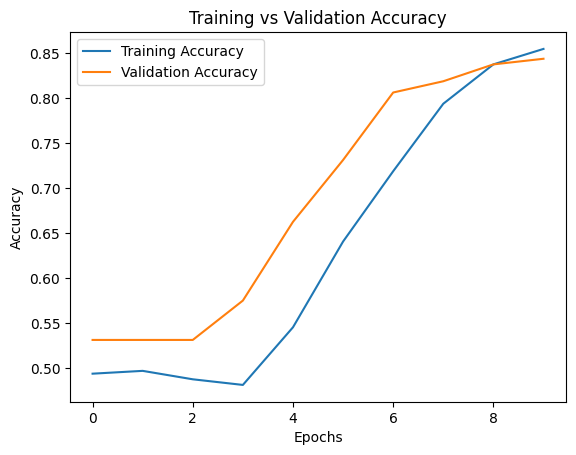

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


## Model Evaluation

In [9]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8562 - loss: 0.4459  
Test Loss: 0.4525
Test Accuracy: 0.8450
